### Importación de librerías necesarias:

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### Carga de datos desde los ficheros

In [3]:
client_test = pd.read_csv('client_test.csv')
client_train = pd.read_csv('client_train.csv')
invoice_test = pd.read_csv('invoice_test.csv')
invoice_train = pd.read_csv('invoice_train.csv')

Acceso a la siguiente información del dataset cargado:
- número total de columnas
- número total de filas
- numero de valores nulos
- tipo de datos de cada columna (en este caso objetct, float e int)

In [4]:
print('Info del dataset "client_test":\n')
client_test.info()
print('-------------------------------------------------')
print('\nInfo del dataset "client_train":\n')
client_train.info()
print('-------------------------------------------------')
print('\nInfo del dataset "invoice_test":\n')
invoice_test.info()
print('-------------------------------------------------')
print('\nInfo del dataset "invoice_train":\n')
invoice_train.info()

Info del dataset "client_test":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   disrict        58069 non-null  int64 
 1   client_id      58069 non-null  object
 2   client_catg    58069 non-null  int64 
 3   region         58069 non-null  int64 
 4   creation_date  58069 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.2+ MB
-------------------------------------------------

Info del dataset "client_train":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object

Muestra de los 10 primeros registros de los dataset de entrenamiento:

In [5]:
client_train.head(n=10)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
5,69,train_Client_10000,11,103,29/09/1993,0.0
6,62,train_Client_100000,11,309,07/06/2012,0.0
7,60,train_Client_100001,11,101,12/04/2006,0.0
8,62,train_Client_100002,11,301,31/12/2006,0.0
9,60,train_Client_100003,11,101,25/10/2011,0.0


In [6]:
invoice_train.head(n=10)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


Acceso al resumen estadístico de los dataset de entrenamiento:

In [7]:
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [8]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


Máximo año del que se disponen datos de clientes

In [9]:
print(pd.to_datetime(client_train['creation_date']).max())

2019-09-10 00:00:00


### Comprobación de valores nulos por columna en los dataset de entrenamiento
No hay valores nulos.

In [10]:
client_missing_values = client_train.isnull().sum()
print('Valores nulos dataset "client_train":')
print(client_missing_values)

Valores nulos dataset "client_train":
disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64


In [11]:
invoice_missing_values = invoice_test.isnull().sum()
print('Valores nulos dataset "invoice_test":')
print(invoice_missing_values)

Valores nulos dataset "invoice_test":
client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


### Análisis valores únicos del dataset de entrenamiento

In [12]:
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


In [13]:
for col in ['disrict', 'region', 'client_catg']:
    print('\nValores únicos variable ', col, ':', client_train[col].nunique())
    print(sorted(client_train[col].unique()))



Valores únicos variable  disrict : 4
[60, 62, 63, 69]

Valores únicos variable  region : 25
[101, 103, 104, 105, 106, 107, 199, 206, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 371, 372, 379, 399]

Valores únicos variable  client_catg : 3
[11, 12, 51]


In [14]:
#Obtener valores únicos en los datos del entrenamiento de facturas
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [15]:
for col in ['counter_type', 'counter_statue']:
    print('\nValores únicos variable ', col, ':', invoice_train[col].nunique())
    print(invoice_train[col].unique())


Valores únicos variable  counter_type : 2
['ELEC' 'GAZ']

Valores únicos variable  counter_statue : 16
[0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]


In [16]:
# Calcular el número de clientes únicos por cada valor de counter_statue
clients_counter_statue = invoice_train.groupby('counter_statue')['client_id'].nunique()

# Imprimir los resultados
print("Número de clientes únicos por cada valor posible de counter_statue:")
print(clients_counter_statue)

Número de clientes únicos por cada valor posible de counter_statue:
counter_statue
0         133366
1          34371
2             25
3             74
4            604
5          16874
46             1
420            1
618            1
769            1
269375         1
0           1002
1            257
4              5
5            127
A              1
Name: client_id, dtype: int64


In [17]:
for col in ['counter_type', 'counter_statue']:
    print('\nValores únicos variable ', col, ':', invoice_test[col].nunique())
    print(invoice_test[col].unique())


Valores únicos variable  counter_type : 2
['ELEC' 'GAZ']

Valores únicos variable  counter_statue : 6
[0 1 5 4 3 2]


### Distribución de los datos de entrenamiento

#### - Por la variable etiqueta
Valores posibles de "target": 0 - No Fraude, 1 - Fraude

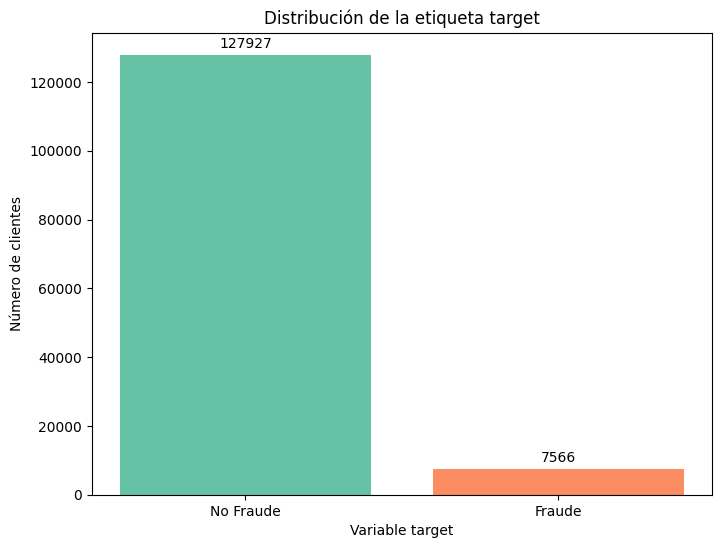

In [18]:
# Calcular la estadística de target
target_statistics = client_train.groupby(['target'])['client_id'].count()

plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.bar(x=target_statistics.index, 
        height=target_statistics.values,
        tick_label=['No Fraude', 'Fraude'], 
        color = ['#66c2a5', '#fc8d62'])

# Añadir etiquetas a las barras
for i, value in enumerate(target_statistics.values):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')
    
# Configura el título del gráfico
plt.title('Distribución de la etiqueta target')
plt.xlabel('Variable target')
plt.ylabel('Número de clientes')

# Muestra el gráfico
plt.show()


#### - Por las variables descriptivas

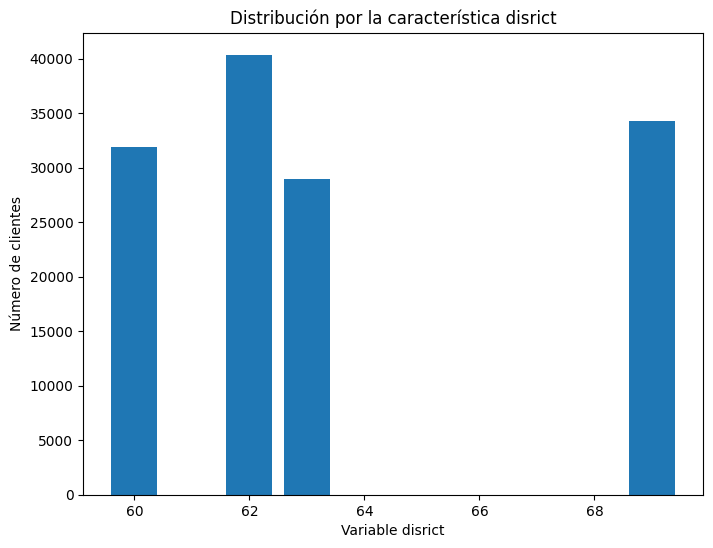

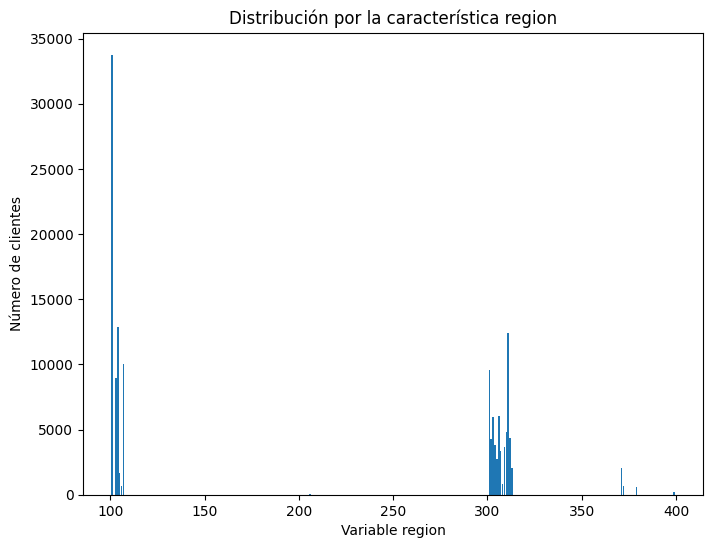

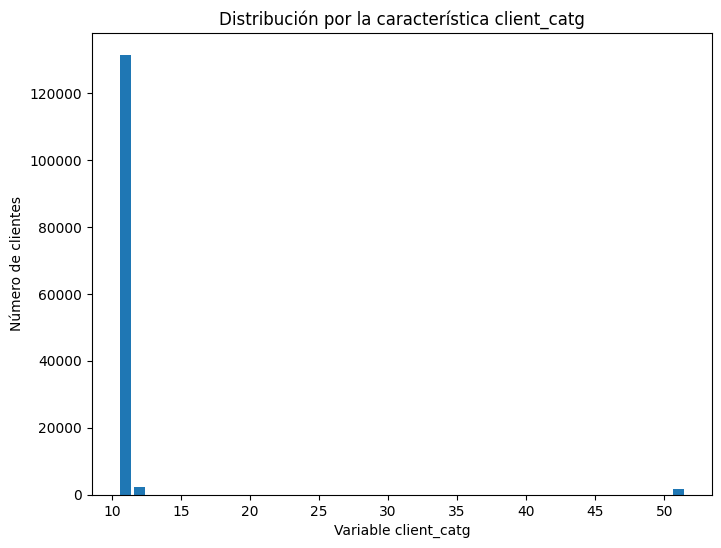

In [19]:
for col in ['disrict','region','client_catg']:
    distribution = client_train.groupby([col])['client_id'].count()
    
    plt.figure(figsize=(8, 6))
    
    plt.bar(x=distribution.index, 
            height=distribution.values)
    
    plt.title('Distribución por la característica '+ col)
    plt.xlabel('Variable ' + col)
    plt.ylabel('Número de clientes')

    plt.show()


In [75]:
# ------------------------BORRAR -----------------------

# Fusionar los conjuntos de datos invoice y client en base a la columna client_id
merged_data = pd.merge(invoice_train, client_train[['client_id', 'target']], on='client_id', how='inner')

# Eliminar duplicados de client_id para contar usuarios únicos
unique_clients = merged_data.drop_duplicates(subset=['client_id'])

# Agrupar los datos fusionados por 'counter_type' y 'target' y contar el número de usuarios únicos
unique_clients_by_counter_type = unique_clients.groupby(['counter_type', 'target']).size().unstack(fill_value=0)

# Mostrar los resultados
print(unique_clients_by_counter_type)


target         False  True 
counter_type               
0              26808   2012
1             101119   5554


<Figure size 800x600 with 0 Axes>

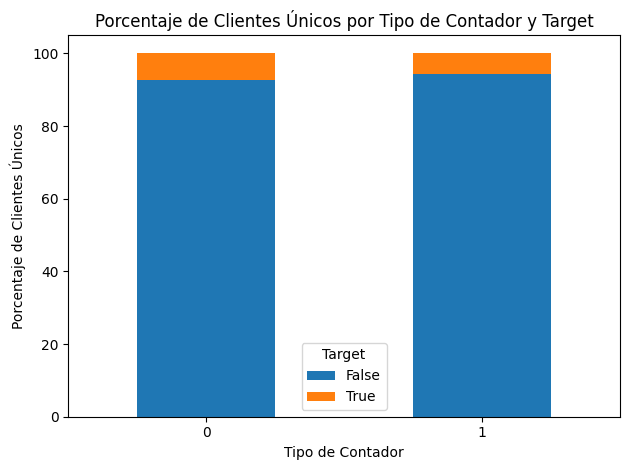

In [77]:
# ------------------------BORRAR -----------------------

# Contar los client_id únicos para cada combinación de counter_type y target
unique_clients = invoice_train.merge(client_train[['client_id', 'target']], on='client_id')\
                                .groupby(['counter_type', 'target'])['client_id'].nunique().reset_index()

# Crear un DataFrame con los porcentajes de client_id únicos
unique_clients['unique_clients_percentage'] = (unique_clients['client_id'] / unique_clients.groupby('counter_type')['client_id'].transform('sum')) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
unique_clients.pivot(index='counter_type', columns='target', values='unique_clients_percentage').plot(kind='bar', stacked=True)
plt.xlabel('Tipo de Contador')
plt.ylabel('Porcentaje de Clientes Únicos')
plt.title('Porcentaje de Clientes Únicos por Tipo de Contador y Target')
plt.legend(title='Target')
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Feature Engineering

#### - Feature transformation

In [20]:
# Función que modifica tipos de datos
def feature_transformation (client, invoice):
    
    # Modificación a tipo de dato 'category'
    client['disrict'] = client['disrict'].astype('category')
    client['region'] = client['region'].astype('category')
    client['client_catg'] =client['client_catg'].astype('category')
    
    # Modificación a tipo de dato 'category'
    if 'target' in client.columns:
        # Convertir la columna 'target' a tipo booleano
        client['target'] =client['target'].astype(bool)
    
    # Modificación a tipo de dato 'datatime'
    client['creation_date'] = pd.to_datetime(client['creation_date'], format='%d/%m/%Y')
    
    invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'], format='%Y-%m-%d')
    invoice['counter_type'] = invoice['counter_type'].map({"ELEC":1,"GAZ":0})
     
    return client, invoice   

In [21]:
client_train_new1, invoice_train_new1 = feature_transformation(client_train, invoice_train)
client_test_new1, invoice_test_new1 = feature_transformation(client_test, invoice_test)

#### - Feature creation

In [22]:
# Creación de nuevas características
def feature_creation (client, invoice):   

    # nueva variable 'region_group': agrupación de region
    client['region_group'] = client['region'].apply(lambda x: 100 if x<=100 else 300 if x>=300 else 200).astype('category')
    
    # nueva variable 'months_old': antigüedad en meses de cada cliente (¿calcular sobre 2019 o 2024?)
    client['months_old'] = (2019 - client['creation_date'].dt.year)*12 - client['creation_date'].dt.month
    
    # nueva variable 'invoice_month_date': mes de la facturación
    invoice['month_invoice_date'] = invoice['invoice_date'].dt.month
    
    # nueva variable 'invoice_year_date': año de la facturación
    invoice['year_invoice_date'] = invoice['invoice_date'].dt.year
    
    # nueva variable 'is_weekday': la facturación corresponde a un día laborable (entre semana) o fin de semana
    invoice['is_weekday'] = (invoice['invoice_date'].dt.weekday < 5).astype(int)

    # nueva variable 'counter_statue_new': si 'counter_statue' es un valor numérico entre 0 y 5 se mantendrá su valor sino se asignará 99
    invoice['counter_statue_new'] = invoice['counter_statue'].map(lambda x: int(x) 
                                                                  if isinstance(x, str) 
                                                                  and x.isdigit() 
                                                                  and 0 <= int(x) <= 5 
                                                                  else 99).astype('category')
    
    
    # nueva variable 'variation_index'
    invoice['variation_index'] = invoice['new_index'] - invoice['old_index']
    
    return client, invoice

In [23]:
client_train_new2, invoice_train_new2 = feature_creation(client_train_new1, invoice_train_new1)
client_test_new2, invoice_test_new2 = feature_creation(client_test_new1, invoice_test_new1)

In [121]:
print('\nInfo del nuevo dataset "client_train":\n')
client_train_new2.info()
print('-------------------------------------------------')
print('\nInfo del nuevo dataset "invoice_train":\n')
invoice_train_new2.info()


Info del nuevo dataset "client_train":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   disrict        135493 non-null  category      
 1   client_id      135493 non-null  object        
 2   client_catg    135493 non-null  category      
 3   region         135493 non-null  category      
 4   creation_date  135493 non-null  datetime64[ns]
 5   target         135493 non-null  bool          
 6   region_group   135493 non-null  category      
 7   months_old     135493 non-null  int32         
dtypes: bool(1), category(4), datetime64[ns](1), int32(1), object(1)
memory usage: 3.2+ MB
-------------------------------------------------

Info del nuevo dataset "invoice_train":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype 

#### - Nuevo dataset

In [139]:
def generate_dataset_new(client, invoice):
    # Agrupar por 'client_id' y contar el número de filas por cliente
    number_invoices = invoice.groupby('client_id').size().reset_index(name='number_invoices')
    
    # Fusionar el resultado con el dataset 'client' por 'client_id'
    client = pd.merge(client, number_invoices, on='client_id', how='left')
    
    
    
    # Calcular la media de 'is_weekday' por cliente
    is_weekday_mean = invoice.groupby('client_id')['is_weekday'].mean().reset_index(name='is_weekday_mean')

    # Fusionar la nueva variable 'is_weekday_mean' con el dataset 'client'
    client = pd.merge(client, is_weekday_mean, on='client_id', how='left')
    
    
    
    # Calcular la media de counter_type para cada cliente en invoice_train
    counter_type_mean = invoice.groupby('client_id')['counter_type'].unique().apply(lambda x: sum(x) / len(x))

    # Fusionar la nueva variable 'counter_type_mean' con el dataset 'client'
    client = pd.merge(client, counter_type_mean, on='client_id', how='left')
    
    
    
    # Calcular la media de 'variation_index_mean' por cliente
    variation_index_mean = invoice.groupby('client_id')['variation_index'].mean().reset_index(name='variation_index_mean')

    # Fusionar la nueva variable 'is_weekday_mean' con el dataset 'client'
    client = pd.merge(client, variation_index_mean, on='client_id', how='left')
    
    
    
    # Obtener la diferencia de días entre las facturas para cada cliente
    invoice['variation_time'] = invoice.groupby('client_id')['invoice_date'].diff().dt.days
    
    # Calcular las estadísticas de variation_time por cliente
    variation_time_agg = invoice.groupby('client_id')['variation_time'].agg(['mean', 'std', 'min', 'max'])
    
    # Renombrar las columnas del DataFrame de estadísticas de variation_time
    variation_time_agg.columns = ['variation_time_mean', 'variation_time_std', 'variation_time_min', 'variation_time_max']
    
    # Fusionar el dataset de estadísticas de variation_time con el dataset de clientes
    client = pd.merge(client, variation_time_agg, on='client_id', how='left')
    
    
    
    # Contar la frecuencia de cada tipo de tarifa para cada cliente
    tarif_type_frequency = invoice.groupby(['client_id', 'tarif_type']).size().unstack(fill_value=0)

    # Renombrar las columnas
    tarif_type_frequency.columns = [f'tarif_type_frequency_{col}' for col in tarif_type_frequency.columns]

    # Fusionar 'tarif_type_frequency' con el dataset 'client'
    client = pd.merge(client, tarif_type_frequency, on='client_id', how='left')
    
    
    
    # Seleccionar las columnas que comienzan por 'consommation' en el dataset invoice_train
    consommation_columns = [col for col in invoice_train.columns if col.startswith('consommation')]

    # Calcular las estadísticas deseadas para estas columnas
    consommation_stats = invoice.groupby('client_id')[consommation_columns].agg(['mean', 'std', 'min', 'max'])

    # Renombrar las columnas resultantes para que sean más descriptivas
    consommation_stats.columns = ['_'.join(col).strip() for col in consommation_stats.columns.values]

    # Restablecer el índice para tener 'client_id' como una columna en lugar de un índice
    consommation_stats.reset_index(inplace=True)

    # Fusionar las estadísticas de consommation al dataset principal "client_train"
    client = pd.merge(client, consommation_stats, on='client_id', how='left')


    return client


In [140]:
invoice_train_new2_order = invoice_train_new2.sort_values(['client_id', 'invoice_date'])
invoice_test_new2_order = invoice_test_new2.sort_values(['client_id', 'invoice_date'])

dataset_train_new1 = generate_dataset_new(client_train_new2, invoice_train_new2_order)
dataset_test_new1 = generate_dataset_new(client_test_new2, invoice_test_new2_order)

In [148]:
print('\nInfo del nuevo dataset "dataset_train_new1":\n')
dataset_train_new1.info()


Info del nuevo dataset "dataset_train_new1":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   disrict                    135493 non-null  category      
 1   client_id                  135493 non-null  object        
 2   client_catg                135493 non-null  category      
 3   region                     135493 non-null  category      
 4   creation_date              135493 non-null  datetime64[ns]
 5   target                     135493 non-null  bool          
 6   region_group               135493 non-null  category      
 7   months_old                 135493 non-null  int32         
 8   number_invoices            135493 non-null  int64         
 9   is_weekday_mean            135493 non-null  float64       
 10  counter_type               135493 non-null  float64       
 11  varia

In [144]:
dataset_train_new1.head(n=10)

,disrict,client_id,client_catg,region,creation_date,target,region_group,months_old,number_invoices,is_weekday_mean,...,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max
0,60,train_Client_0,11,101,1994-12-31,False,200,288,35,0.971429,...,0,186,0.000000,0.000000,0,0,0.000000,0.000000,0,0
1,69,train_Client_1,11,107,2002-05-29,False,200,199,37,0.945946,...,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0
2,62,train_Client_10,11,301,1986-03-13,False,300,393,18,0.944444,...,0,682,0.000000,0.000000,0,0,0.000000,0.000000,0,0
3,69,train_Client_100,11,105,1996-07-11,False,200,269,20,0.950000,...,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0
4,62,train_Client_1000,11,303,2014-10-14,False,300,50,14,0.714286,...,0,400,117.357143,289.433294,0,800,36.714286,105.421081,0,382
5,69,train_Client_10000,11,103,1993-09-29,False,200,303,48,0.875000,...,0,400,3.770833,26.125100,0,181,0.000000,0.000000,0,0
6,62,train_Client_100000,11,309,2012-06-07,False,300,78,40,1.000000,...,0,262,0.000000,0.000000,0,0,0.000000,0.000000,0,0
7,60,train_Client_100001,11,101,2006-04-12,False,200,152,78,0.871795,...,0,64,0.000000,0.000000,0,0,0.000000,0.000000,0,0
8,62,train_Client_100002,11,301,2006-12-31,False,300,144,2,1.000000,...,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0
9,60,train_Client_100003,11,101,2011-10-25,False,200,86,5,1.000000,...,0,5624,320.000000,438.178046,0,800,4882.000000,7024.667928,0,15257


In [152]:
# Eliminar las variables 'client_id' y 'creation_date', ya que son variables innecesarias para predecir si es fraudulento o no
def drop_columns (dataset):

    col_drop = ['client_id', 'creation_date']
    for col in col_drop:
        dataset = dataset.drop([col], axis=1)
        
    return dataset

In [153]:
dataset_train_new2 = drop_columns(dataset_train_new1)
dataset_test_new2 = drop_columns(dataset_test_new1)

In [154]:
print('\nInfo del nuevo dataset "dataset_train_new2":\n')
dataset_train_new2.info()


Info del nuevo dataset "dataset_train_new2":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 47 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   disrict                    135493 non-null  category
 1   client_catg                135493 non-null  category
 2   region                     135493 non-null  category
 3   target                     135493 non-null  bool    
 4   region_group               135493 non-null  category
 5   months_old                 135493 non-null  int32   
 6   number_invoices            135493 non-null  int64   
 7   is_weekday_mean            135493 non-null  float64 
 8   counter_type               135493 non-null  float64 
 9   variation_index_mean       135493 non-null  float64 
 10  variation_time_mean        131281 non-null  float64 
 11  variation_time_std         125906 non-null  float64 
 12  variation_time_min       